# Artificial Neural Networks

## 1. Problem Statement
   To create an artificial neural network which predicts the the person has the heart diesease or not.

## 2. Neural network
  The neural network contains no. of hidden layers and the hidden layers contaions the no. of neurons.

  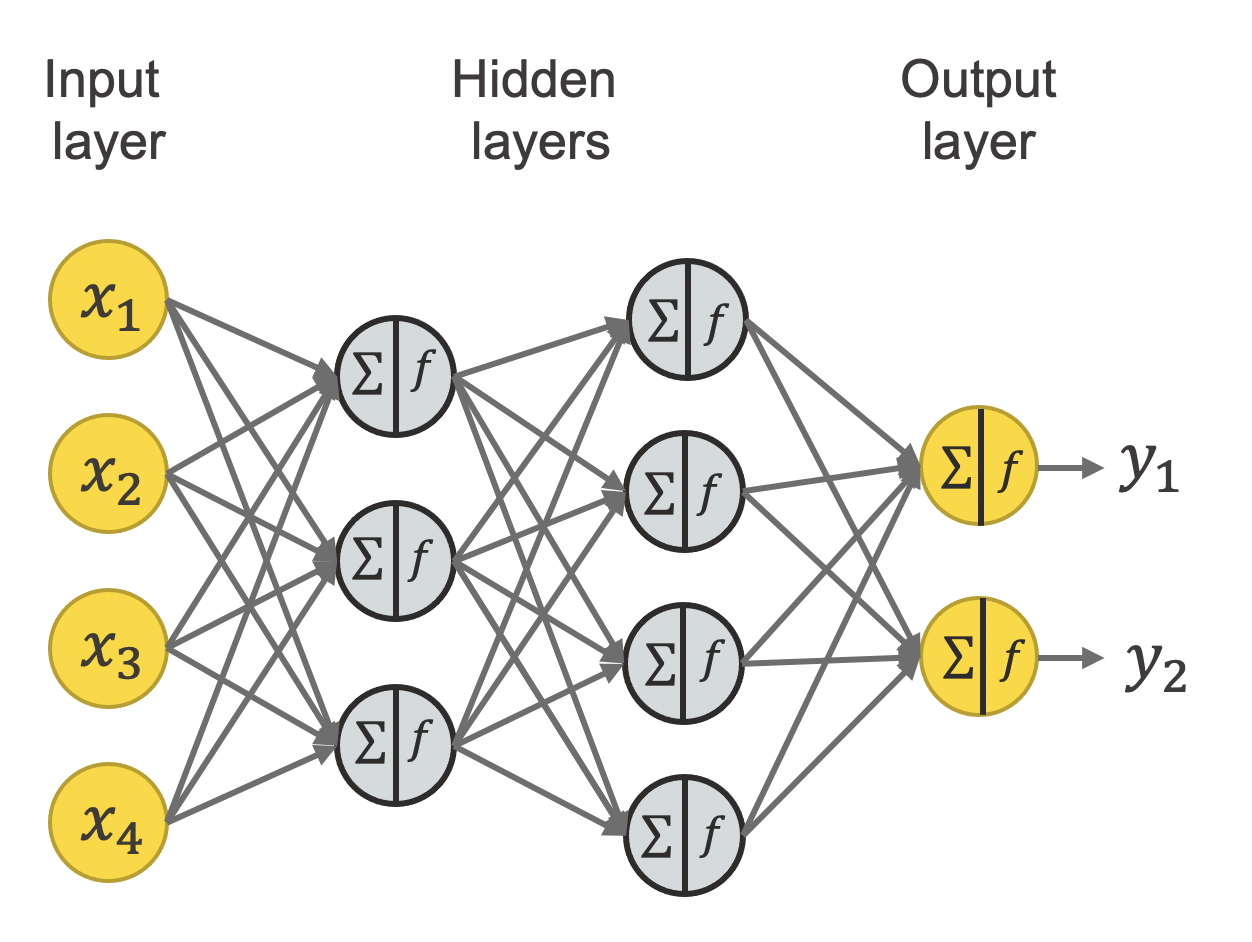



## 3. Working

   each neuron in hidden layer performs the two operations.


1.   summation of weights and input features plus bias
      ```
       Y = W1X1 + W2X2 + ... + WnXn + bias
       ```
       where,
       
            w = weights
            x = input features
        

2.   applying the activation function
      ```
      act(Y)
      ```
      The activation function is used to trigger the neuron i.e to activate the neuron.

      there are various type of activation functions
      1. sigmoid
      2. tanh
      3. Relu
      4. Leaky Relu
      5. ELU
      6. PRELU
      7. softmax

3. optimizers
   optimizers are used to reduce the cost function,
   
   optimization happen in backpropagation by updating the weights of the neural networks.

   there are various optimizers used ,
   1. Gradient Descent
   2. Stachostic Gradient Descent
   3. mini-batch SGD
   4. SGD with momentum
   5. Adagrad
   6. Adadelta and RMSPROP
   7. Adam optimizer (best optimizer)



## 4. Implementation

1.   import libraries
2.   read dataset
3.   data transformation
4.   neural network training
5.   evaluation



1. import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

tf.config.run_functions_eagerly(True)

2. reading dataset

In [3]:
data = pd.read_csv("heart-disease.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# independent and dependent feature split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.shape

(242, 13)

In [17]:
y_train.shape

(242,)

In [9]:
# standardizing the dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# creating the neural network

In [10]:
# initializing the network
network = Sequential()

In [11]:
# adding the first hidden layer
network.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=13))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# adding the second hidden layer
network.add(Dense(units=4,kernel_initializer="he_uniform",activation="relu"))

In [13]:
# adding the output layer
network.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [14]:
# optimization of the network
network.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
network_history = network.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.3424 - loss: 0.7802 - val_accuracy: 0.5250 - val_loss: 0.7147
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3841 - loss: 0.7604 - val_accuracy: 0.5625 - val_loss: 0.7042
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4340 - loss: 0.7334 - val_accuracy: 0.5500 - val_loss: 0.6953
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5007 - loss: 0.7238 - val_accuracy: 0.5500 - val_loss: 0.6861
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5417 - loss: 0.7001 - val_accuracy: 0.5500 - val_loss: 0.6774
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5051 - loss: 0.6837 - val_accuracy: 0.5625 - val_loss: 0.6682
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5617 - loss: 0.6708 - val_accuracy: 0.5500 - val_loss: 0.6593
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5712 - loss: 0.6668 - val_accuracy: 0.5500 - val_

In [20]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236 (948.00 B)

# model predicions

In [36]:
y_pred = network.predict(x_test)
y_pred = (y_pred > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[27  2]
 [ 5 27]]


In [38]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)

0.8852459016393442


# visualizations

In [23]:
network_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

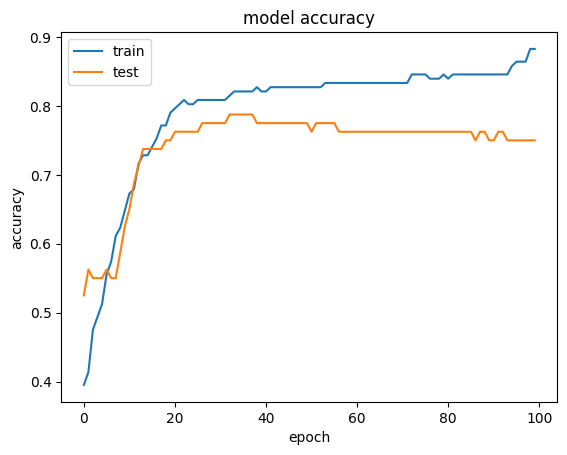

In [42]:
# visualizing the sccuracy on train and test data
plt.plot(network_history.history["accuracy"])
plt.plot(network_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

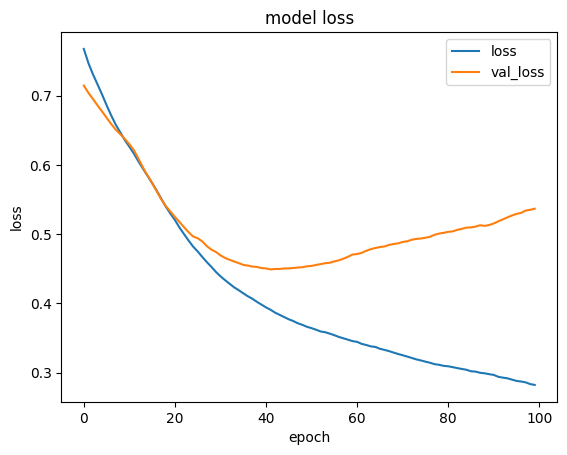

In [44]:
plt.plot(network_history.history["loss"])
plt.plot(network_history.history["val_loss"])
plt.title("model loss")
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Conclusion

The neural network which is used to predict the heart disease predict the results achieving the **0.88** accuracy.